# EDA with Apple Glassdoor Review

Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading dataset & take a look 

In [2]:
df = pd.read_csv("apple_review.csv")
df.head()

,Unnamed: 0,date,reviewNo,employeeType,position,summary,pro,con,advice,overallStar,reviewLink
0,1,"Jun 29, 2018",empReview_21272752,Former Employee - Anonymous Employee,None,Great Place to Work!,Great technology and great people,Some district managers could use more time in ...,Follow up more,5.0,https://www.glassdoor.com/Reviews/Apple-Review...
1,2,"Aug 28, 2014",empReview_4870579,Current Employee - Anonymous Employee,I have been working at Apple full-time (More t...,"Challenging, Rewarding, but ZERO work/life bal...","We work with geniuses - in every department, W...",ZERO ZERO ZERO work/life balance. Execs have b...,None,4.0,https://www.glassdoor.com/Reviews/Apple-Review...
2,3,"Mar 10, 2017",empReview_14128330,Current Employee - Specialist,I have been working at Apple full-time (More t...,A Company as Meticulous as Their Products!,"Competitive Pay, Great Benefits, Amazing Peopl...",None! I had one of the best times ever at this...,You guys are awesome. Keep up the good work!,5.0,https://www.glassdoor.com/Reviews/Apple-Review...
3,4,"May 13, 2015",empReview_6585844,Current Employee - Apple At Home Advisor,I have been working at Apple (More than a year),At-Home-Advisor,The position is at home. The company is AMAZIN...,The schedule changes every 90 days and you hav...,The management consists of a team manager and ...,5.0,https://www.glassdoor.com/Reviews/Apple-Review...
4,5,"Jan 22, 2016",empReview_9295224,Current Employee - Software Engineer IV,I have been working at Apple full-time (More t...,Changing the world (in a small way),Working at Apple means that the things you wor...,"It's a lot of work, teams are usually strapped...","Keep fighting for ""what's right"". Renewable en...",5.0,https://www.glassdoor.com/Reviews/Apple-Review...


drop unnamed and used inported index, drop reviewlink as it's not necessary

In [3]:
df = df.drop(columns = ['Unnamed: 0','reviewLink'])

In [4]:
df.shape

(35632, 9)

### A few observations when first glacing through the dataset:
<br>
#### 1. Seems like in employeeType => the column is spearated by current/former + type <br>
#### 2. There are some duplicate/seemingly duplicate records in reviews <br>
#### 3. Reviews seems to be in multiple languages <br>

i.e. <br>
index:<br>
35602 - 35631<br>




#### Addressing issues with employeeType <br>
#### Split into <br>
1. Type
2. Position
3. Unknown => dont know where this is coming from, might be some strange spaing
4. Unknown => same as 3.

In [5]:
df[['type','position','un1','un2']] = df['employeeType'].str.split('-', expand = True)

In [6]:
# un1 & un2 extra split and need to be cleaned out
df.loc[(df.un1 == 'None')& (df.un2 == 'None'),:]

,date,reviewNo,employeeType,position,summary,pro,con,advice,overallStar,type,un1,un2


In [7]:
# drop employeeTpye, un1, un2; rearrange position and type after reviewNo
df = df.drop(columns = ['employeeType','un1','un2'])

In [8]:
df = df.assign(record = 1)
df = df[['date','reviewNo','type','position','summary','pro','con','advice','overallStar','record']]
df.head()

,date,reviewNo,type,position,summary,pro,con,advice,overallStar,record
0,"Jun 29, 2018",empReview_21272752,Former Employee,Anonymous Employee,Great Place to Work!,Great technology and great people,Some district managers could use more time in ...,Follow up more,5.0,1
1,"Aug 28, 2014",empReview_4870579,Current Employee,Anonymous Employee,"Challenging, Rewarding, but ZERO work/life bal...","We work with geniuses - in every department, W...",ZERO ZERO ZERO work/life balance. Execs have b...,None,4.0,1
2,"Mar 10, 2017",empReview_14128330,Current Employee,Specialist,A Company as Meticulous as Their Products!,"Competitive Pay, Great Benefits, Amazing Peopl...",None! I had one of the best times ever at this...,You guys are awesome. Keep up the good work!,5.0,1
3,"May 13, 2015",empReview_6585844,Current Employee,Apple At Home Advisor,At-Home-Advisor,The position is at home. The company is AMAZIN...,The schedule changes every 90 days and you hav...,The management consists of a team manager and ...,5.0,1
4,"Jan 22, 2016",empReview_9295224,Current Employee,Software Engineer IV,Changing the world (in a small way),Working at Apple means that the things you wor...,"It's a lot of work, teams are usually strapped...","Keep fighting for ""what's right"". Renewable en...",5.0,1


#### Addressing issues with duplicate reviews

#### finding unique values in:
- df.pro
- df.con

In [9]:
#example for messy data
df.tail(5)

,date,reviewNo,type,position,summary,pro,con,advice,overallStar,record
35627,"Jul 6, 2010",empReview_557337,Current Employee,Specialist,How Apple sells dream...,Je ne peux raisonnablement pas recommander de ...,"sous effectif, chaos, manque de communication,...",listen to your employe and respect the law !,2.0,1
35628,"Apr 16, 2012",empReview_1448324,Current Employee,Anonymous Employee,Great!,"Très bonne ambiance, cadre sympa, produits agr...","Difficile d'obtenir certaines infos, tout doit...",None,5.0,1
35629,"Jul 6, 2010",empReview_557337,Current Employee,Specialist,How Apple sells dream...,Je ne peux raisonnablement pas recommander de ...,"sous effectif, chaos, manque de communication,...",listen to your employe and respect the law !,2.0,1
35630,"Apr 16, 2012",empReview_1448324,Current Employee,Anonymous Employee,Great!,"Très bonne ambiance, cadre sympa, produits agr...","Difficile d'obtenir certaines infos, tout doit...",None,5.0,1
35631,"Jul 6, 2010",empReview_557337,Current Employee,Specialist,How Apple sells dream...,Je ne peux raisonnablement pas recommander de ...,"sous effectif, chaos, manque de communication,...",listen to your employe and respect the law !,2.0,1


In [10]:
# dropping duplicates
# assign to new df
df_clean = df.drop_duplicates(['pro','con']).reset_index()
df_clean = df_clean.drop(columns = 'index')
df_clean.head()

,date,reviewNo,type,position,summary,pro,con,advice,overallStar,record
0,"Jun 29, 2018",empReview_21272752,Former Employee,Anonymous Employee,Great Place to Work!,Great technology and great people,Some district managers could use more time in ...,Follow up more,5.0,1
1,"Aug 28, 2014",empReview_4870579,Current Employee,Anonymous Employee,"Challenging, Rewarding, but ZERO work/life bal...","We work with geniuses - in every department, W...",ZERO ZERO ZERO work/life balance. Execs have b...,None,4.0,1
2,"Mar 10, 2017",empReview_14128330,Current Employee,Specialist,A Company as Meticulous as Their Products!,"Competitive Pay, Great Benefits, Amazing Peopl...",None! I had one of the best times ever at this...,You guys are awesome. Keep up the good work!,5.0,1
3,"May 13, 2015",empReview_6585844,Current Employee,Apple At Home Advisor,At-Home-Advisor,The position is at home. The company is AMAZIN...,The schedule changes every 90 days and you hav...,The management consists of a team manager and ...,5.0,1
4,"Jan 22, 2016",empReview_9295224,Current Employee,Software Engineer IV,Changing the world (in a small way),Working at Apple means that the things you wor...,"It's a lot of work, teams are usually strapped...","Keep fighting for ""what's right"". Renewable en...",5.0,1


#### Detecting language inputs

Work in progress -- seems like stop words don't look so good with short comments in cases like this<br>
Will revisit this later

In [11]:
# utilizing nltk stopwords to determine if input is english or not
import nltk
 
ENGLISH_STOPWORDS = set(nltk.corpus.stopwords.words('english'))
NON_ENGLISH_STOPWORDS = set(nltk.corpus.stopwords.words()) - ENGLISH_STOPWORDS
 
STOPWORDS_DICT = {lang: set(nltk.corpus.stopwords.words(lang)) for lang in nltk.corpus.stopwords.fileids()}
 
def get_language(text):
    words = set(nltk.wordpunct_tokenize(text.lower()))
    return max(((lang, len(words & stopwords)) for lang, stopwords in STOPWORDS_DICT.items()), key = lambda x: x[1])[0]
 
 
#def is_english(text):
#    text = text.lower()
#    words = set(nltk.wordpunct_tokenize(text))
#    return len(words & ENGLISH_STOPWORDS) > len(words & NON_ENGLISH_STOPWORDS)

def input_lan(col):
    '''input a pd.series and return what language it is written in'''
    new_col = []
    for row in col:
        new_col.append(get_language(row))
    return new_col

df_clean= df_clean.assign(pro_lan= pd.Series(input_lan(df_clean.pro), index = df_clean.index))
df_clean= df_clean.assign(con_lan= pd.Series(input_lan(df_clean.con), index = df_clean.index))

# a lot of comments dont have stop words so it's a littile bit harder than expected to id language
df_clean.loc[(df_clean.pro_lan!= 'english' )& (df_clean.con_lan != 'english'),:].head()

,date,reviewNo,type,position,summary,pro,con,advice,overallStar,record,pro_lan,con_lan
22,"Jun 20, 2018",empReview_21126566,Current Employee,Technical Expert,Technical Expert,Great Benefits PackageGreat PayGood employee c...,Strenuous shiftsLong hours/ ShiftsNot Much lee...,None,4.0,1,arabic,arabic
40,"Jun 16, 2018",empReview_21073797,Current Employee,Anonymous Employee,A great place to start,Energetic environmentTeam building experienceC...,Retail is retailWorking holidays,None,4.0,1,arabic,dutch
53,"Jun 12, 2018",empReview_21004268,Current Employee,Anonymous Employee,Best place to work,"compensation, environment, peers, incentives, ...","minimal work life balance, leadership",None,5.0,1,arabic,arabic
94,"Jun 4, 2018",empReview_20891961,Current Employee,Anonymous Employee,Excellent benefits,"Benefits - bonus, RSU, ESPP, EPS, 401k","Hectic work environment, lacks flexibility",None,4.0,1,arabic,arabic
212,"May 4, 2018",empReview_20441852,Former Employee,Anonymous Employee,A lesson learned,"Great benefits, awesome bonuses, good referral...","Work/life balance, favoritism, cult like menta...",None,4.0,1,arabic,arabic


In [12]:
# it was able to carve out some of the foreign languages we see at tail when glancing through the dataset
df_clean.loc[(df_clean.pro_lan!= 'english' )& (df_clean.con_lan != 'english'),:].tail(5)

,date,reviewNo,type,position,summary,pro,con,advice,overallStar,record,pro_lan,con_lan
12034,"Feb 19, 2015",empReview_5950196,Former Employee,Channel Marketing Manager France,Pas pour tout le monde,Travailler pour des produits formidables; être...,"Un travail en silos, conditionné par le secret...",None,3.0,1,french,french
12035,"Nov 15, 2014",empReview_5383420,Former Employee,Apple Family Room Specialist,Bonne expérience enrichissante mais beaucoup d...,"Ambiance formidable, à l'américaine, qui récom...","Un seul week-end par mois (Apple Store), diffi...",Encadrement régulier. Retours clients analysés...,3.0,1,french,french
12036,"Oct 18, 2014",empReview_5197916,Current Employee,Responsable boutique,Une expérience,"Les + : produits fabuleux, une école du market...",- : un management qui laisse à désirer parfois...,"Prenez vos responsabilités, trop de personnes ...",3.0,1,french,french
12037,"Apr 16, 2012",empReview_1448324,Current Employee,Anonymous Employee,Great!,"Très bonne ambiance, cadre sympa, produits agr...","Difficile d'obtenir certaines infos, tout doit...",None,5.0,1,french,french
12038,"Jul 6, 2010",empReview_557337,Current Employee,Specialist,How Apple sells dream...,Je ne peux raisonnablement pas recommander de ...,"sous effectif, chaos, manque de communication,...",listen to your employe and respect the law !,2.0,1,french,french


In [13]:
%store df_clean #saving this so that we can pass this into other notebooks

Stored 'df_clean' (DataFrame)


#### Check df datatypes before performing EDA anaylsis

#### - Set date to date format
#### - Set type, position to categorical

In [14]:
df_clean.dtypes

date            object
reviewNo        object
type            object
position        object
summary         object
pro             object
con             object
advice          object
overallStar    float64
record           int64
pro_lan         object
con_lan         object
dtype: object

In [15]:
df_clean.date, df_clean.type, df_clean.position = pd.to_datetime(df_clean.date), pd.Categorical(df_clean.type), pd.Categorical(df_clean.position)
df_clean.dtypes

date           datetime64[ns]
reviewNo               object
type                 category
position             category
summary                object
pro                    object
con                    object
advice                 object
overallStar           float64
record                  int64
pro_lan                object
con_lan                object
dtype: object

## Working on Some Basic EDA

1. No. of Reviews Over Time & Avg Reviews by Employee Type Over Time
2. Word Clouds
    - Summary
    - Pros
    - Cons

In [16]:
# reshape df for EDA
df_sum = df_clean.groupby([df_clean.date.dt.to_period('M'),'type']).record.sum().reset_index()
df_sum.set_index('date', inplace = True)
df_sum.head()

,type,record
date,,
2008-01,Current Employee,1
2008-02,Current Employee,2
2008-04,Current Employee,14
2008-04,Former Employee,6
2008-05,Current Employee,25


#### Visulaizing No. Of Reviews Over Time By Employee Type

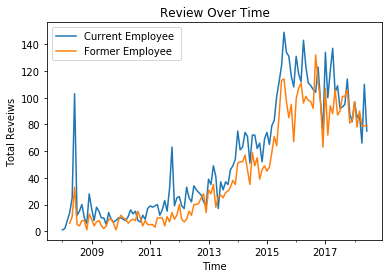

In [17]:
df_sum.pivot(columns = 'type', values = 'record').plot()
plt.title('Review Over Time')
plt.xlabel('Time')
plt.ylabel('Total Reveiws')
plt.legend(loc = 'upper left')

plt.show()

#### Visualizing Avg. Reviews Over Time By Employee Type

In [18]:
df_avg = df_clean.groupby([df_clean.date.dt.to_period('M'), 'type']).overallStar.mean().reset_index()
df_avg.set_index('date',inplace = True)
df_avg.head()

,type,overallStar
date,,
2008-01,Current Employee,5.000000
2008-02,Current Employee,4.500000
2008-04,Current Employee,4.642857
2008-04,Former Employee,4.000000
2008-05,Current Employee,4.360000


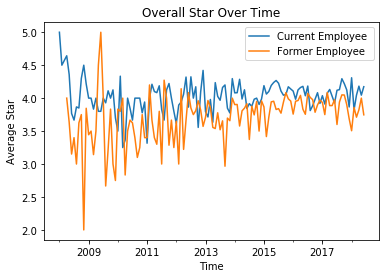

In [19]:
df_avg.pivot(columns ='type', values = 'overallStar').plot()
plt.title('Overall Star Over Time')
plt.xlabel('Time')
plt.ylabel('Average Star')
plt.legend(loc = 'upper right')
plt.show()

#### There is a tail effect in position so we resummarize the df to see top 20 frequent reviews by position and look at the avg. overallStar for those positions

In [20]:
position = pd.pivot_table(df_clean, values = ['overallStar', 'record'], 
                          index = ['type','position'], aggfunc = {'overallStar': np.mean,'record':np.sum}).sort_values(
    by = 'record', ascending = False).reset_index()
position.head(20)

,type,position,overallStar,record
0,Current Employee,Anonymous Employee,4.122531,2481
1,Former Employee,Anonymous Employee,3.939498,2033
2,Current Employee,Specialist,4.107955,528
3,Former Employee,Specialist,3.989247,465
4,Former Employee,Mac Specialist (Apple Store),3.840659,182
5,Current Employee,Mac Specialist (Apple Store),4.017341,173
6,Current Employee,Family Room Specialist,3.910256,156
7,Former Employee,Family Room Specialist,3.826087,138
8,Current Employee,Mac Genius,3.900826,121
9,Current Employee,Technical Specialist,4.079646,113


#### Now Let's build out some Word Clouds
1. Preprocessing Text Using NLTK
    - Convert words to lower case
    - Take out punctuations
    - Remove Frequent Words
<br>    
<br>
2. Build some word clouds
    - Summary Word Cloud
    - Pro & Con Word Cloud
<br>    
<br>
3. Dive further using NGram Tecniques
    - Summary, Pro & Con Bi Gram
    - Summary, Pro & Con Tri Gram
<br>    
<br>    

In [21]:
# do some testing
from nltk.util import ngrams
df_clean.summary[0]
text = nltk.word_tokenize(str(df_clean.summary[0]).lower())
bi_gram = ngrams(text,2)
list(bi_gram)

[('great', 'place'), ('place', 'to'), ('to', 'work'), ('work', '!')]

In [22]:
# seems like we need to remove punctuations using Regex
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
text_1 = tokenizer.tokenize((str(df_clean.summary[0].lower())))
bi_gram_1 = ngrams(text_1,2)
list(bi_gram_1) # This is what we want !

[('great', 'place'), ('place', 'to'), ('to', 'work')]

In [23]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    '''text preprocessing function'''
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #ords = [ps.stem(w) for w in words] #4
    return words

def corpus(data):
    '''convert preprocessed data to corpus'''
    words = preprocessing(data)
    corpus = ''
    for item in words:
        corpus += item + ' '
    return corpus

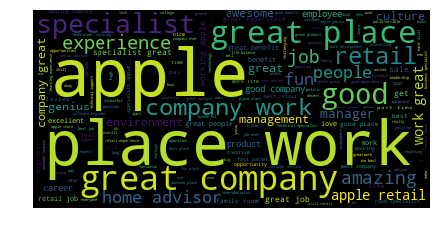

In [24]:
wordcloud = WordCloud(background_color = 'black', 
                      stopwords = stop_words).generate(corpus(df_clean.summary))

#plot the image
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()        

#### Since we are creating multiple word clouds, Let's make the above codes a function

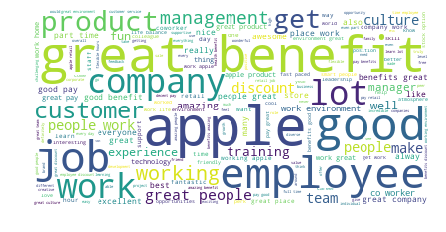

In [25]:
def wordcloud(df_col, color):
    '''input a df_col that contains comments and generate a wordcloud with color 
    of user selection'''
    wordcloud = WordCloud(background_color = color,
                         stopwords = stop_words,
                         ).generate(corpus(df_col))
    
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()
    
wordcloud(df_clean.pro, 'white')

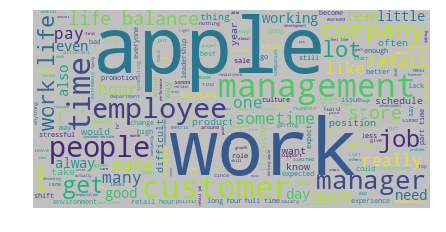

In [26]:
wordcloud(df_clean.con,'silver')

#### Now Construct Bigrams and Trigrams Using NLTK
1. Preprocssing Using NLTK Word Tokenizer
2. Construct Bi/Tri Grams Using NLTK ngram
3. Visulize Results

In [27]:
from collections import Counter
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    # return n_gram count into dict{'A' 'B': count} other than dict{('A', 'B'): count} (list format)
    return [ ' '.join(grams) for grams in n_grams] 

# using preprocessing here for df_clean.summary instead of corpus
# preprocessing returns a list; corpus retuns string
summary_corpus = preprocessing(df_clean.summary)
summary_bi_gram = get_ngrams(summary_corpus, 2)
count_bi_gram = Counter(summary_bi_gram)
count_bi_gram.most_common(10)

[('place work', 667),
 ('great company', 634),
 ('great place', 510),
 ('company work', 305),
 ('home advisor', 209),
 ('apple retail', 208),
 ('work great', 195),
 ('company great', 159),
 ('good company', 149),
 ('apple great', 148)]

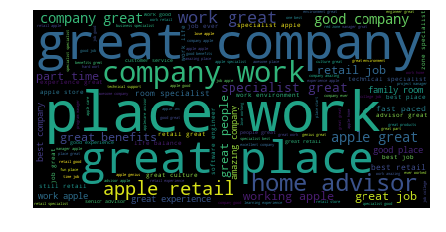

In [28]:
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords).generate_from_frequencies(
    count_bi_gram
)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [29]:
# now make a function for pros & cons
def ngram_viz(df_col, n, color):
    '''given input df_col, N as in number of NGrams, color as background color for Word Cloud
    return a word cloud for that column's N Gram ''' 
    n_gram_corpus = preprocessing(df_col)
    n_gram = get_ngrams(n_gram_corpus, n)
    count_n_gram = Counter(n_gram)
    wordcloud = WordCloud(background_color = color).generate_from_frequencies(
    count_n_gram
    )
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()
    

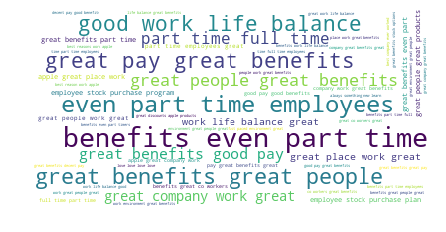

In [30]:
ngram_viz(df_clean.pro, 4, 'white')

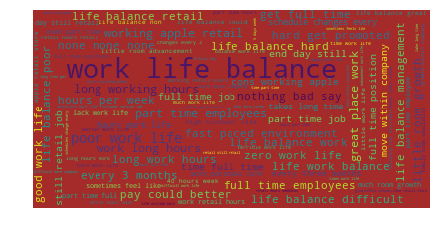

In [31]:
ngram_viz(df_clean.con, 3, 'brown')